In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from matplotlib.patches import Rectangle


[nltk_data] Downloading package stopwords to /home/wdolan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
transcripts = pd.read_csv('../../../../../transcripts/transcripts2022_02_06.csv')
stop_words = set(stopwords.words('english'))

In [14]:
#Determine how many utterances in corpus are explicitly labelled as dispatch
def is_explicit_dispatch(string):
    identifiers = ["radio", "dispatch", "station", "dis"]
    for iden in identifiers:
        if str(string).lower().find(iden) > -1:
            #some formatting errors put the actual transcript in sid col
            if len(string.lower()) > 15:
                return False
            return True
    return False
explicit_utterances = transcripts[transcripts['sid'].apply(is_explicit_dispatch) == True].reset_index(drop = True)

In [15]:
#this was much smaller than expected
len(explicit_utterances)

22

In [16]:
#manually identifying dispatchers from my own transcripts
def transcribed_by_wdolan(string):
    return str(string) == "wdolan"
wdolan_utterances = transcripts[transcripts['transcriber'].apply(transcribed_by_wdolan) == True].reset_index(drop = True)

In [17]:
known_dispatchers = {
        #Zone 1
        "201808130924-30969-27730wpd.txt": ["SID-2", "SID-3"],
        "201808130854-145935-27730wpd.txt": ["SID-2", "SID-6", "SID-8"],
        "201808130825-776116-27730wpd.txt": ["SID-2"],
        "201808130755-832378-27730wpd.txt": ["SID-1"],
        "201808130725-631742-27730wpd.txt": ["SID-2", "SID-3", "SID-21"], #half confident for SID-2
        #Zone 4
        "201808110452-623962-26296wpd.txt": ["SID-1", "SID-5"], #SID-5 is station but not dispatcher
        "201808110422-235521-26296wpd.txt": ["SID-2", "SID-4"], #SID-4 appears to be supporting SID-2
        "201808110352-116394-26296wpd.txt": ["SID-1"],
        "201808110322-66148-26296wpd.txt": ["SID-2"],
        "201808110253-161076-26296wpd.txt": ["SID-1"],
        "201808110223-804185-26296wpd.txt": ["SID-1"],
        "201808110153-832068-26296wpd.txt": ["SID-1"],
        "201808110123-880909-26296wpd.txt": ["SID-2"],
        "201808110053-807063-26296wpd.txt": ["SID-1"],
        "201808110023-518721-26296wpd.txt": ["SID-4", "SID-30"], #SID-30 is either a managing LEO or dispatch
        "201808101855-799879-26296wpd.txt": ["SID-2"], #poor file quality, I think some speakers may have been other dispatchers
        "201808101825-999402-26296wpd.txt": ["SID-2"],
        "201808101756-174204-26296wpd.txt": ["SID-2", "SID-7", "SID-8"], #poor file quality, SID-7 and SID-2 likely the same person
        "201808101726-325608-26296wpd.txt": ["SID-3"], #extremely poor file quality, many dispatch utterances are <X>
        "201808101656-104005-26296wpd.txt": ["SID-3"], #extremely poor file quality
        "201808100400-756911-26296wpd.txt": ["SID-1", "SID-20"], #possibly also SID-19
        "201808100330-109122-26296wpd.txt": ["SID-2"],
        "201808100300-456014-26296wpd.txt": ["SID-1"], #SID-5 sergeant, poor file quality
        "201808100231-406609-26296wpd.txt": ["SID-2", "SID-5"], #possibly SID-1 is dispatch over SID-2
        "201808100201-307688-26296wpd.txt": ["SID-1", "SID-3"], #SID-1 talks slightly like an LEO but is most likely dispatch
        #Zone 8
        "201808100205-936015-27158wpd.txt": ["SID-2"], #file of note
        "201808100235-943094-27158wpd.txt": ["SID-1"],
        "201808100305-606428-27158wpd.txt": ["SID-1"],
        "201808100334-764462-27158wpd.txt": ["SID-2"],
        "201808100404-696965-27158wpd.txt": ["SID-2"],
        "201808100434-616279-27158wpd.txt": ["SID-3", "SID-12"],
        "201808100504-279813-27158wpd.txt": ["SID-1"],
        "201808100534-941703-27158wpd.txt": ["SID-1", "SID-4"], #maybe SID-6 also
        "201808100604-692405-27158wpd.txt": ["SID-1"],
        "201808100633-50058-27158wpd.txt": ["SID-2", "SID-3", "SID-5"], #SID-5 may be some assistant, SID-20 possible dispatch
        "201808100932-407300-27158wpd.txt": ["SID-1", "SID-7"],
        "201808101002-723724-27158wpd.txt": ["SID-2"],
        "201808101032-781791-27158wpd.txt": ["SID-1", "SID-5"],
        "201808101102-932251-27158wpd.txt": ["SID-2", "SID-12"],
        "201808101132-852196-27158wpd.txt": ["SID-1"],
        "201808101202-916683-27158wpd.txt": ["SID-2", "SID-41"], #SID-41 only has 1 utterance but speakers heavily like dispatch
        "201808101231-353866-27158wpd.txt": ["SID-1", "SID-5", "SID-37"], #half confident for SID-5, SID-37 possibly radio assistant
        "201808101301-540691-27158wpd.txt": ["SID-1", "SID-7"],
        "201808101331-564141-27158wpd.txt": ["SID-2", "SID-3", "SID-29"], 
        "201808101401-953546-27158wpd.txt": ["SID-2"],
    }

In [18]:
def check_known_dispatchers(sid, dispatchers):
    for dispatcher in dispatchers:
        if dispatcher == str(sid):
            return True
    return False

def wdolan_dispatcher(file, sid):
    return check_known_dispatchers(sid, known_dispatchers.get(file, []))

wdolan_dispatch_utterances = wdolan_utterances[wdolan_utterances.apply(
    lambda row : wdolan_dispatcher(row['file'], row['sid']), axis = 1) == True].reset_index(drop = True)

wdolan_leo_utterances = wdolan_utterances[wdolan_utterances.apply(
    lambda row : wdolan_dispatcher(row['file'], row['sid']), axis = 1) == False].reset_index(drop = True)

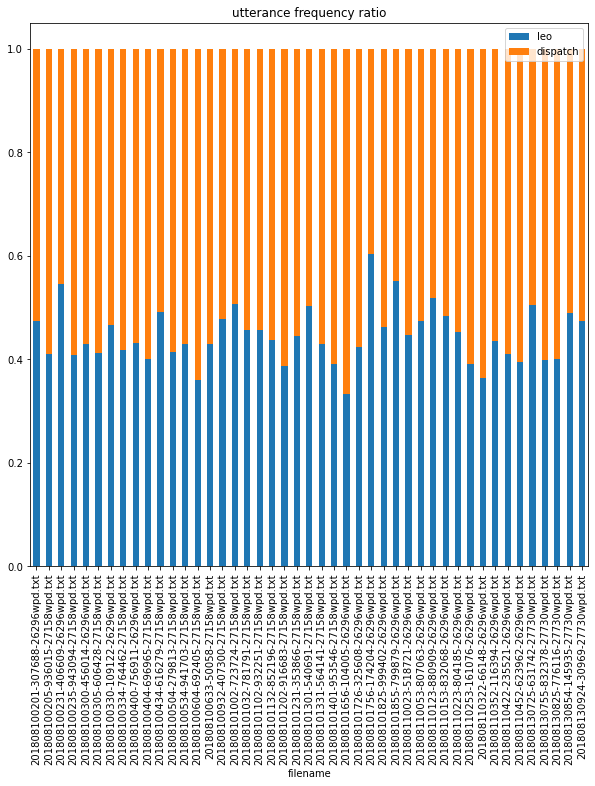

In [19]:
#Generate frequency ratio stacked bar graph
wdolan_dispatch_per_file = wdolan_dispatch_utterances.value_counts(subset = 'file')
wdolan_leo_per_file = wdolan_leo_utterances.value_counts(subset = 'file')
wdolan_comb_per_file = wdolan_dispatch_per_file.add(wdolan_leo_per_file)
wdolan_leo_per_file_ratio = wdolan_leo_per_file.divide(wdolan_comb_per_file)
wdolan_dis_per_file_ratio = wdolan_dispatch_per_file.divide(wdolan_comb_per_file)
ratio_freq_df = pd.merge(wdolan_leo_per_file_ratio.rename("leo"), wdolan_dis_per_file_ratio.rename("dispatch"), left_index = True, right_index = True)
freq_ratio_plot = ratio_freq_df.plot(kind = "bar", stacked = True, title="utterance frequency ratio", xlabel = "filename", figsize = (10, 10)).legend(loc = 'upper right')
freq_ratio_plot.figure.set_facecolor('white')
freq_ratio_plot.figure.savefig('utterance_frequency_ratio.png', bbox_inches='tight')

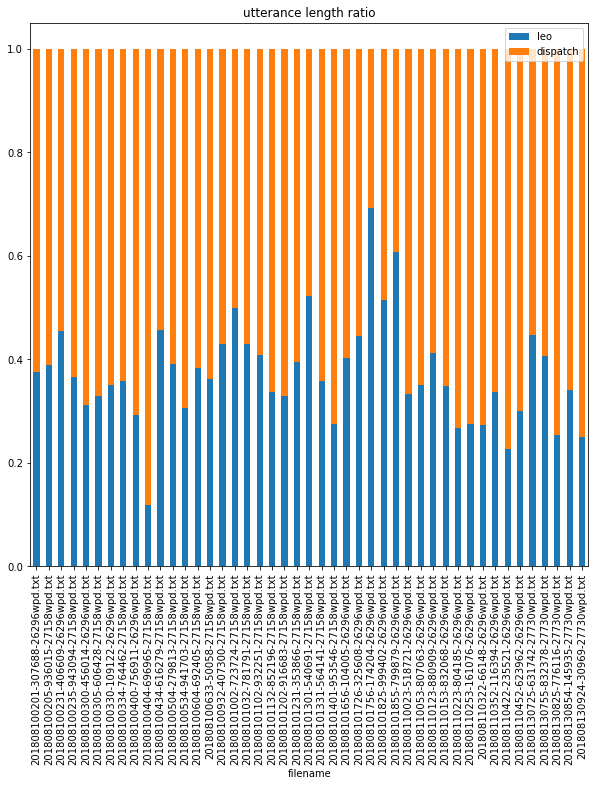

In [20]:
#Generate utterance length ratio stacked bar graph
dispatch_time_sum = wdolan_dispatch_utterances.groupby('file').sum('length')['length']
leo_time_sum = wdolan_leo_utterances.groupby('file').sum('length')['length']
comb_time_sum = wdolan_utterances.groupby('file').sum('length')['length']
leo_time_sum_ratio = leo_time_sum.divide(comb_time_sum)
dispatch_time_sum_ratio = dispatch_time_sum.divide(comb_time_sum)
ratio_time_df = pd.merge(leo_time_sum_ratio.rename("leo"), dispatch_time_sum_ratio.rename("dispatch"), left_index = True, right_index = True)
length_ratio_plot = ratio_time_df.plot(kind = "bar", stacked = True, title="utterance length ratio", xlabel = "filename", figsize = (10, 10)).legend(loc = 'upper right')
length_ratio_plot.figure.set_facecolor('white')
length_ratio_plot.figure.savefig('utterance_length_ratio.png', bbox_inches='tight')

In [10]:
#for file of note, dispatcher speaks longer and more frequently

In [21]:
print("utterance duration ratio, dispatch vs leo", dispatch_time_sum_ratio.mean(), ":", leo_time_sum_ratio.mean())
print("utterance frequency ratio, dispatch vs leo", wdolan_dis_per_file_ratio.mean(), ":", wdolan_leo_per_file_ratio.mean())

utterance duration ratio, dispatch vs leo 0.6288776319863957 : 0.3711223680136045
utterance frequency ratio, dispatch vs leo 0.5553253653719137 : 0.44467463462808643


In [22]:
#average length of an utterance across ALL files in sample
print("dispatch avg utterance duration: ", wdolan_dispatch_utterances.groupby('file').mean('length')['length'].mean())
print("leo avg utterance duration: ", wdolan_leo_utterances.groupby('file').mean('length')['length'].mean())
print("combined avg utterance duration ", wdolan_utterances.groupby('file').mean('length')['length'].mean())
print("\n")
#average total utterance length
print("dispatch total utterance length avg", dispatch_time_sum.mean())
print("leo total total utterance length avg", leo_time_sum.mean()) 
print("combined total utterance length avg", comb_time_sum.mean())
print("\n")
#average quantity of utterances across ALL files in sample
print("dispatch avg file autterance quantity ", wdolan_dispatch_per_file.mean())
print("leo avg file utterance quantity ", wdolan_leo_per_file.mean())

dispatch avg utterance duration:  2.1626780256169797
leo avg utterance duration:  1.500968462637445
combined avg utterance duration  1.8735806087681197


dispatch total utterance length avg 188.2952888888889
leo total total utterance length avg 114.0432222222223
combined total utterance length avg 302.3385111111112


dispatch avg file autterance quantity  94.97777777777777
leo avg file utterance quantity  76.13333333333334


In [23]:
#Average utterance length for speakers across files
dispatch_utterance_length_avgs = wdolan_dispatch_utterances.groupby('file').mean('length')['length']
leo_utterance_length_avgs = wdolan_leo_utterances.groupby('file').mean('length')['length']
comb_utterance_length_avgs = wdolan_utterances.groupby('file').mean('length')['length']
# 04, 05, and 08 have an average utterance length for both groups below one second,
length_avgs = pd.concat([comb_utterance_length_avgs.rename("all_speakers"), dispatch_utterance_length_avgs.rename("dispatch"), leo_utterance_length_avgs.rename("leo")], axis=1)
length_avgs

,all_speakers,dispatch,leo
file,,,
201808100201-307688-26296wpd.txt,1.310895,1.556500,1.038000
201808100205-936015-27158wpd.txt,2.050236,2.119532,1.950197
201808100231-406609-26296wpd.txt,1.469127,1.760344,1.225781
201808100235-943094-27158wpd.txt,1.920465,2.057830,1.721815
201808100300-456014-26296wpd.txt,1.214670,1.461606,0.885423
201808100305-606428-27158wpd.txt,1.996686,2.281067,1.590429
201808100330-109122-26296wpd.txt,1.023160,1.246175,0.768286
201808100334-764462-27158wpd.txt,2.058374,2.270245,1.762868
201808100400-756911-26296wpd.txt,1.170174,1.459148,0.790627


In [24]:
#total time spent speaking for each file
time_sum_avgs = pd.concat([comb_time_sum.rename("all_speakers"), dispatch_time_sum.rename("dispatch"), leo_time_sum.rename("leo")], axis=1)
time_sum_avgs

,all_speakers,dispatch,leo
file,,,
201808100201-307688-26296wpd.txt,149.442,93.390,56.052
201808100205-936015-27158wpd.txt,711.432,434.504,276.928
201808100231-406609-26296wpd.txt,196.863,107.381,89.482
201808100235-943094-27158wpd.txt,305.354,193.436,111.918
201808100300-456014-26296wpd.txt,221.070,152.007,69.063
201808100305-606428-27158wpd.txt,203.662,136.864,66.798
201808100330-109122-26296wpd.txt,76.737,49.847,26.890
201808100334-764462-27158wpd.txt,187.312,120.323,66.989
201808100400-756911-26296wpd.txt,181.377,128.405,52.972


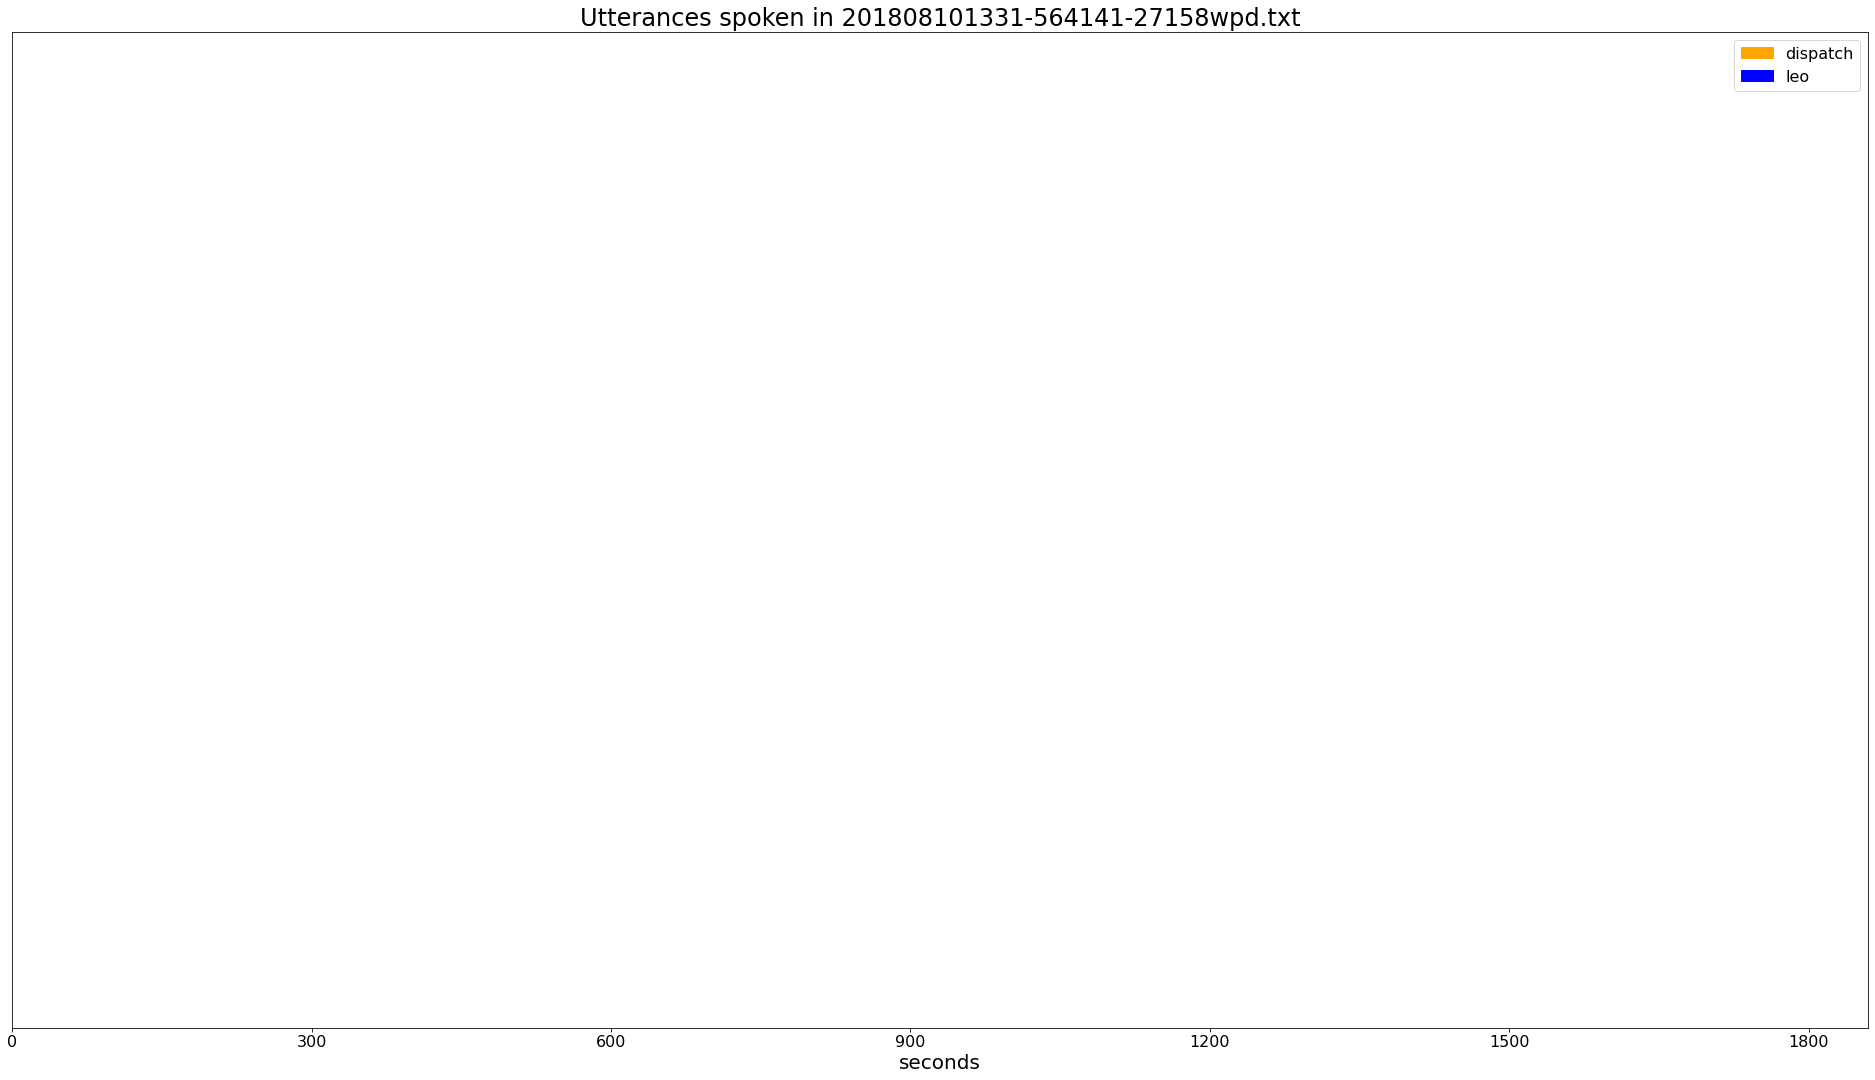

In [26]:
#the start of sequencing work


fig, ax = plt.subplots()

height = 30

px = 1/mpl.rcParams['figure.dpi']
ax.set_xlim(0, 1860)
ax.set_xlabel("seconds", fontsize=20)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.MultipleLocator(300))


leo_patch = mpatches.Patch(color='blue', label='leo')
dispatch_patch = mpatches.Patch(color='orange', label='dispatch')
legend = ax.legend(handles=[dispatch_patch, leo_patch], loc='upper right', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
   tick.label.set_fontsize(16)

fig.set_figwidth(2395*px)
fig.set_figheight(1319*px)
fig.set_dpi(mpl.rcParams['figure.dpi'])
fig.set_facecolor('white')



    
grouped_by_file = wdolan_utterances.groupby(wdolan_utterances['file'])


for file in wdolan_utterances['file'].unique():
    file_df = grouped_by_file.get_group(file)
    file_timestamps = pd.Series(dtype = object)
    
    
    #extract start, end, and speaker role for each utterance
    for index, row in file_df.iterrows():
        #silence_period[1] = row['start']
        utterance_info = [row['start'], row['length'], wdolan_dispatcher(row['file'], row['sid'])]

        utterance_timestamp = pd.Series(utterance_info)
        
        file_timestamps = pd.concat([file_timestamps, utterance_timestamp], axis=1)   
        
    
    #plot utterances
    file_timestamps = file_timestamps.dropna(axis=1)
    for index, timestamp in file_timestamps.items():
        #dispatcher utterance
        if timestamp[2] == True:
            color = 'orange'
        #nondispatch (leo) utterance
        else:
            color = 'blue'
        ax.add_patch(Rectangle((timestamp[0], 0), timestamp[1], height, 
                                   facecolor = color))
        

    
    ax.set_title('Utterances spoken in ' + file, fontsize=24)
    fig.savefig('seq_' + file[:len(file)-3] + 'png', bbox_inches='tight', 
                dpi=mpl.rcParams['figure.dpi'])
    
    #reset marked utterances for next file
    ax.patches = []
